In [1]:
2 + 2

4

In [4]:
2 ** 5

32

In [6]:
'hi mom'

'hi mom'

In [7]:
2 + 3
4 * 5

20

---

In [8]:
def read_file(filename): 
    from urllib.request import urlopen 
    import re
    with open(filename, encoding='utf8') as f:
        s = f.read()
    return re.sub('\\s+', ' ', s)

In [13]:
alice_in_wonderland_text = read_file('data/alice_in_wonderland.txt')
alice_in_wonderland_chapters = alice_in_wonderland_text.split('CHAPTER')[13:]

In [14]:
pride_and_prejudice_text = read_file('data/pride_and_prejudice.txt')
pride_and_prejudice_chapters = pride_and_prejudice_text.split('CHAPTER')[1:]

In [15]:
from datascience import *

In [16]:
Table().with_column('Chapters', alice_in_wonderland_chapters)

Chapters
I. Down the Rabbit-Hole Alice was beginning to get very ...
II. The Pool of Tears “Curiouser and curiouser!” cried ...
III. A Caucus-Race and a Long Tale They were indeed a q ...
IV. The Rabbit Sends in a Little Bill It was the White ...
V. Advice from a Caterpillar The Caterpillar and Alice ...
VI. Pig and Pepper For a minute or two she stood lookin ...
VII. A Mad Tea-Party There was a table set out under a ...
VIII. The Queen’s Croquet-Ground A large rose-tree stoo ...
IX. The Mock Turtle’s Story “You can’t think how glad I ...
"X. The Lobster Quadrille The Mock Turtle sighed deeply, ..."


In [17]:
import numpy as np

In [18]:
np.char.count(alice_in_wonderland_chapters, 'Alice')

array([28, 26, 23, 31, 35, 43, 51, 39, 52, 30, 16, 23])

In [19]:
np.char.count(alice_in_wonderland_chapters, 'Queen')

array([ 0,  0,  0,  0,  0,  4,  2, 36, 14,  0,  9, 10])

In [20]:
counts = Table().with_columns(
    'Alice', np.char.count(alice_in_wonderland_chapters, 'Alice'),
    'Queen', np.char.count(alice_in_wonderland_chapters, 'Queen'),
    'Rabbit', np.char.count(alice_in_wonderland_chapters, 'Rabbit')
)
counts

Alice,Queen,Rabbit
28,0,6
26,0,4
23,0,0
31,0,12
35,0,0
43,4,0
51,2,0
39,36,6
52,14,0
30,0,1


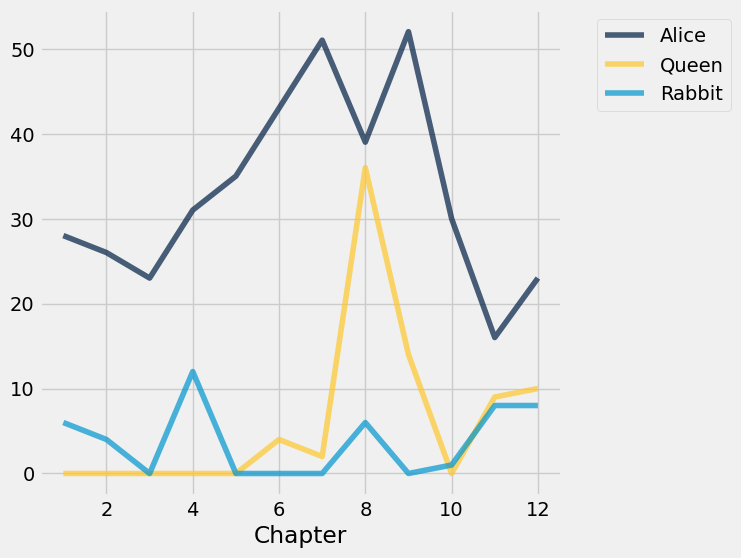

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

counts.with_column('Chapter', np.arange(1, 13)).plot(column_for_xticks='Chapter')

In [22]:
np.char.count(alice_in_wonderland_chapters, 'Alice')

array([28, 26, 23, 31, 35, 43, 51, 39, 52, 30, 16, 23])

In [23]:
np.cumsum(counts.column('Alice'))

array([ 28,  54,  77, 108, 143, 186, 237, 276, 328, 358, 374, 397])

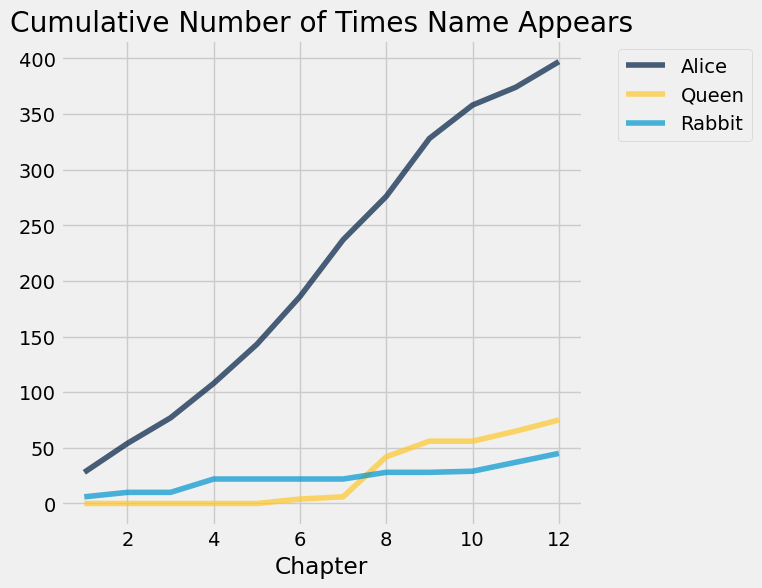

In [24]:
cum_counts_alice = np.cumsum(counts.column("Alice"))
cum_counts_queen = np.cumsum(counts.column("Queen"))
cum_counts_rabbit = np.cumsum(counts.column("Rabbit"))
cumulative_table = Table().with_columns(
    'Chapter', np.arange(1, 13),
    'Alice', cum_counts_alice,
    'Queen', cum_counts_queen,
    'Rabbit', cum_counts_rabbit
)
cumulative_table.plot(column_for_xticks='Chapter')
plt.title('Cumulative Number of Times Name Appears')
plt.show()

In [25]:
Table().with_column('Chapters', pride_and_prejudice_chapters)

Chapters
"I. It is a truth universally acknowledged, that a singl ..."
II. Mr. Bennet was among the earliest of those who wait ...
"III. Not all that Mrs. Bennet, however, with the assist ..."
"IV. When Jane and Elizabeth were alone, the former, who ..."
V. Within a short walk of Longbourn lived a family with ...
VI. The ladies of Longbourn soon waited on those of Net ...
VII. Mr. Bennet’s property consisted almost entirely in ...
"VIII. At five o’clock the two ladies retired to dress, ..."
IX. Elizabeth passed the chief of the night in her sist ...
X. The day passed much as the day before had done. Mrs. ...


In [26]:
names = ['Elizabeth', 'Darcy', 'Jane', 'Bingley']
mentions = {name: np.char.count(pride_and_prejudice_chapters, name) for name in names}
counts = Table().with_columns((name, mentions[name]) for name in names)

In [27]:
counts

Elizabeth,Darcy,Jane,Bingley
0,0,1,4
1,0,0,7
4,7,5,16
3,7,1,11
2,3,3,2
11,14,9,8
14,1,12,8
13,10,5,21
8,8,8,17
16,21,2,18


In [28]:
counts.show()

Elizabeth,Darcy,Jane,Bingley
0,0,1,4
1,0,0,7
4,7,5,16
3,7,1,11
2,3,3,2
11,14,9,8
14,1,12,8
13,10,5,21
8,8,8,17
16,21,2,18


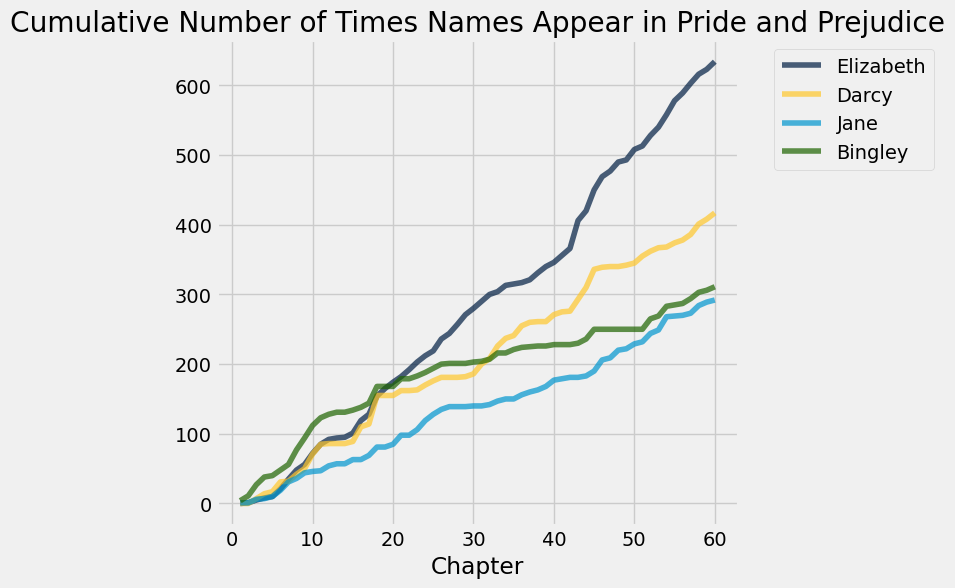

In [29]:
cumulative_table = Table().with_column('Chapter', np.arange(1, len(pride_and_prejudice_chapters) + 1))
cumulative_table = cumulative_table.with_columns((name, np.cumsum(counts.column(name))) for name in names)
cumulative_table.plot(column_for_xticks='Chapter')
plt.title('Cumulative Number of Times Names Appear in Pride and Prejudice')
plt.show()

In [30]:
len(pride_and_prejudice_chapters)

60

In [31]:
len('hello')

5

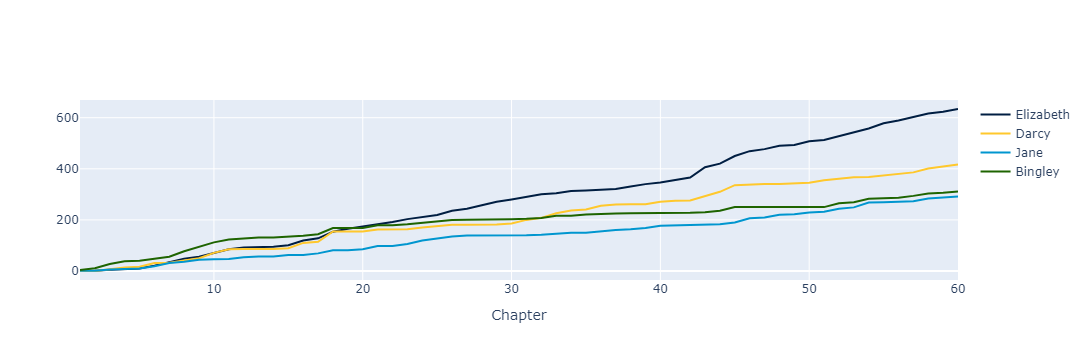

In [32]:
Table.interactive_plots()
cumulative_table.plot(column_for_xticks=0)
Table.static_plots()

In [33]:
length_a = Table().with_columns([
        'Length', [len(s) for s in alice_in_wonderland_chapters],
        'Periods', np.char.count(alice_in_wonderland_chapters, '.')
    ])
length_p = Table().with_columns([
        'Length', [len(s) for s in pride_and_prejudice_chapters],
        'Periods', np.char.count(pride_and_prejudice_chapters, '.')
    ])

In [34]:
length_a

Length,Periods
11335,44
10893,46
9143,63
13835,57
11771,74
13735,111
12569,121
13592,86
12532,114
11291,92


In [35]:
length_p

Length,Periods
4459,59
4287,63
9551,106
5925,53
5255,61
12981,112
11153,109
10958,105
9739,117
12441,126


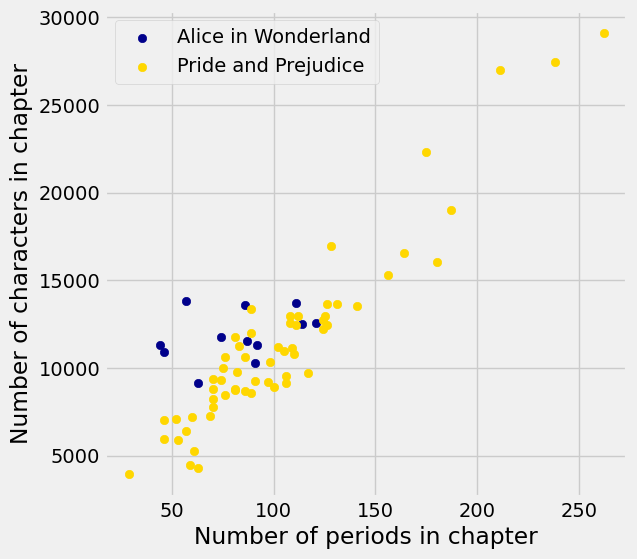

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(length_a.column(1), length_a.column(0), color='darkblue')
plt.scatter(length_p.column(1), length_p.column(0), color='gold')
plt.legend(['Alice in Wonderland', 'Pride and Prejudice'])
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');

In [ ]:
# Twitter's original character limit was 140
# Character limit for SMS messages is 160